# 1. Installation of packages

In [1]:
!pip install numpy
!pip install matplotlib
!pip install rank-bm25
!pip install pandas

# 2. Search algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from rank_bm25 import BM25Okapi

TWIT_PREVIEW_LEN = 40
DEFAULT_TOP_N = 5

class SearchAlgorithm:
    
    def update_ranker(self, corpus, k1=1.5, b=0.75, epsilon=0.25):
        self.corpus = corpus
        tokenized_corpus = [doc.split(" ") for doc in corpus]
        self.ranker = BM25Okapi(tokenized_corpus, k1=k1, b=b, epsilon=epsilon)
        
    def get_scores(self, query):
        tokenized_query = query.split(" ")
        return self.ranker.get_scores(tokenized_query)
    
    def get_top_n(self, query, n=DEFAULT_TOP_N):
        tokenized_query = query.split(" ")
        return self.ranker.get_top_n(tokenized_query, self.corpus, n=n)
    
    def plot_top_n(self, query, n=DEFAULT_TOP_N):        
        scores = self.get_scores(query)
        sorted_scores, sorted_corpus = zip(*sorted(zip(scores, corpus), key=lambda x: x[0], reverse=True))
        
        plt.rcdefaults()
        fig, ax = plt.subplots()

        plot_scores = sorted_scores[:n]
        plot_corpus = sorted_corpus[:n]
        
        y_pos = np.arange(len(plot_corpus))
        ax.barh(y_pos, plot_scores)
        ax.invert_yaxis()
        
        subcorpus = [s[:TWIT_PREVIEW_LEN] for s in plot_corpus]
        ax.set_yticks(y_pos, labels=subcorpus)
                
        ax.set_ylabel('StockTwit')
        ax.set_xlabel('Score')
        
        plt.show()        

# 3. Usage

## 3.1 Plotting search result

In [3]:
corpus = [
    "@lechleidner I'm generally not a fan of biotech, but this chart is in a well defined technical pattern. "+
    "Here's something many traders are likely watching.  No guarantee it will play out like the projection on the chart, "+
    "but it happens often enough to keep an eye on. I may even buy a little if I see an entry I like. "+
    "I looked back and it appears I've missed your chart requests more than once. "+
    "If I miss them, it isn't on purpose, so make sure to ask again. "+
    "I take chart requests to hopefully help others, but you guys many times introduce me to tickers "+
    "I may not currently be watching, so I often benefit also! "+
    "Call me selfish if you would like, but please keep those chart requests coming. "+
    "lol $RAPT is a good one.",
    
    "@Autist_Trader yeah, no one bought the lows... "+
    "and now constantly wishes we went back there. Same ol story... "+
    "Hooman nature on display right there.",
    
    "Top 2000 #EthereumWhales Hold $80 Million Worth of $SHIB on Average    coinedition.com/top-2000-et...",
    
    "$SPY Can literally see where bodies fell to the ground on this chart. Dayum, what a week to remember.",
    
    "$SPY - Closes the week with a bullish candle that engulfs the 20 SMA on this 5 year, weekly chart.",
    
    "Wanna share some TA later on Sunday, not sure whether to bore you to death with SPY/ES again, or share something different... "+
    "Any sector you'd want to see, or ... dealer's choice? "+
    "Will pass by late after my regular Sunday call... or if too exhausted, mañana. ✊🏼",
    
    "$FDAX_F a clean bullish reversal #GER40",
    
    "$FTSE has the biggest upside potential 300 points higher, how to trade it take the trial trendtradingdna.com/premium/"+
    "Hope all are prepping well for next week.",
]

In [4]:
algo = SearchAlgorithm()
algo.update_ranker(corpus, k1=1.5, b=0.75, epsilon=0.25)

In [5]:
query = "$SPY bullish"
algo.get_scores(query)

array([0.        , 0.        , 0.        , 1.21838141, 2.39904851,
       0.        , 1.53133558, 0.        ])

In [6]:
algo.get_top_n(query)

['$SPY - Closes the week with a bullish candle that engulfs the 20 SMA on this 5 year, weekly chart.',
 '$FDAX_F a clean bullish reversal #GER40',
 '$SPY Can literally see where bodies fell to the ground on this chart. Dayum, what a week to remember.',
 '$FTSE has the biggest upside potential 300 points higher, how to trade it take the trial trendtradingdna.com/premium/Hope all are prepping well for next week.',
 "Wanna share some TA later on Sunday, not sure whether to bore you to death with SPY/ES again, or share something different... Any sector you'd want to see, or ... dealer's choice? Will pass by late after my regular Sunday call... or if too exhausted, mañana. ✊🏼"]

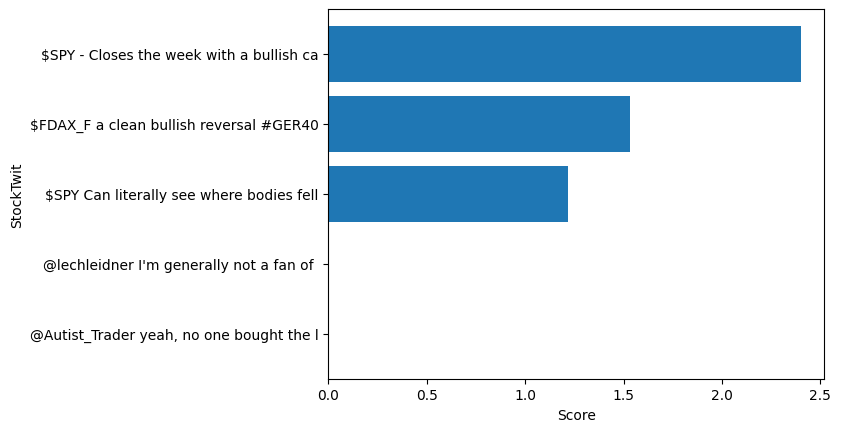

In [7]:
algo.plot_top_n(query)

## 3.2 Connecting to CSV

In [8]:
import pandas as pd

df = pd.read_csv("example.csv")
df

,id,twit_url,twit_text,twit_user,twit_user_url
0,4,https://stocktwits.com/message/4,Sorry I mean trading $V ;),@Prospectus,https://stocktwits.com/Prospectus
1,5,https://stocktwits.com/message/5,Following HEK ($HEK for stocktweets) this morn...,@joshmather,https://stocktwits.com/joshmather
2,6,https://stocktwits.com/message/6,Wondering when the $AAPL rocket is going to ta...,@anthonybrown,https://stocktwits.com/anthonybrown
3,7,https://stocktwits.com/message/7,Welcome early adopters! Remember to prefix the...,@Stocktwits,https://stocktwits.com/Stocktwits
4,9,https://stocktwits.com/message/9,My $AAPL puts are now barely profitable. I st...,@andyswan,https://stocktwits.com/andyswan
...,...,...,...,...,...
150,245,https://stocktwits.com/message/245,reserved shares of $SPDE $ROYL and $GRO as pos...,@timothysykes,https://stocktwits.com/timothysykes
151,246,https://stocktwits.com/message/246,$ORCL (22.91) Cowen sees strong fiscal Q4 resu...,@TechStockRadar,https://stocktwits.com/TechStockRadar
152,247,https://stocktwits.com/message/247,The Australian Dollar has been my fav currency...,@GregorMacdonald,https://stocktwits.com/GregorMacdonald
153,248,https://stocktwits.com/message/248,$IDEV getting up on the wrong side of the bed,@whatthetrading,https://stocktwits.com/whatthetrading


In [9]:
algo = SearchAlgorithm()
algo.update_ranker(df.twit_text, k1=1.5, b=0.75, epsilon=0.25)

query = "$ROYL premarket"

df["score"] = algo.get_scores(query)  # We need to use get_scores() to handle index.
df

,id,twit_url,twit_text,twit_user,twit_user_url,score
0,4,https://stocktwits.com/message/4,Sorry I mean trading $V ;),@Prospectus,https://stocktwits.com/Prospectus,0.000000
1,5,https://stocktwits.com/message/5,Following HEK ($HEK for stocktweets) this morn...,@joshmather,https://stocktwits.com/joshmather,0.000000
2,6,https://stocktwits.com/message/6,Wondering when the $AAPL rocket is going to ta...,@anthonybrown,https://stocktwits.com/anthonybrown,0.000000
3,7,https://stocktwits.com/message/7,Welcome early adopters! Remember to prefix the...,@Stocktwits,https://stocktwits.com/Stocktwits,0.000000
4,9,https://stocktwits.com/message/9,My $AAPL puts are now barely profitable. I st...,@andyswan,https://stocktwits.com/andyswan,0.000000
...,...,...,...,...,...,...
150,245,https://stocktwits.com/message/245,reserved shares of $SPDE $ROYL and $GRO as pos...,@timothysykes,https://stocktwits.com/timothysykes,3.344230
151,246,https://stocktwits.com/message/246,$ORCL (22.91) Cowen sees strong fiscal Q4 resu...,@TechStockRadar,https://stocktwits.com/TechStockRadar,0.000000
152,247,https://stocktwits.com/message/247,The Australian Dollar has been my fav currency...,@GregorMacdonald,https://stocktwits.com/GregorMacdonald,0.000000
153,248,https://stocktwits.com/message/248,$IDEV getting up on the wrong side of the bed,@whatthetrading,https://stocktwits.com/whatthetrading,0.000000


In [10]:
TOP_N = 3
search_result = df.sort_values(by=['score'], ascending=False)[:TOP_N]
search_result

,id,twit_url,twit_text,twit_user,twit_user_url,score
154,249,https://stocktwits.com/message/249,$ROYL having a tough time in the premarket also,@whatthetrading,https://stocktwits.com/whatthetrading,9.298886
146,239,https://stocktwits.com/message/239,still having fun with $ROYL and $SPF,@whatthetrading,https://stocktwits.com/whatthetrading,4.206612
150,245,https://stocktwits.com/message/245,reserved shares of $SPDE $ROYL and $GRO as pos...,@timothysykes,https://stocktwits.com/timothysykes,3.344230


## 3.3 Handling JSON

### 3.3.1 Converting to an array of JSON objects

In [11]:
import json

array_of_json = json.loads(search_result.to_json(orient="records"))

indented_str = json.dumps(array_of_json, indent=4)
print(indented_str)

[
    {
        "id": 249,
        "twit_url": "https://stocktwits.com/message/249",
        "twit_text": "$ROYL having a tough time in the premarket also",
        "twit_user": "@whatthetrading",
        "twit_user_url": "https://stocktwits.com/whatthetrading",
        "score": 9.2988858551
    },
    {
        "id": 239,
        "twit_url": "https://stocktwits.com/message/239",
        "twit_text": "still having fun with $ROYL and $SPF",
        "twit_user": "@whatthetrading",
        "twit_user_url": "https://stocktwits.com/whatthetrading",
        "score": 4.2066119468
    },
    {
        "id": 245,
        "twit_url": "https://stocktwits.com/message/245",
        "twit_text": "reserved shares of $SPDE $ROYL and $GRO as possible shorts for later today",
        "twit_user": "@timothysykes",
        "twit_user_url": "https://stocktwits.com/timothysykes",
        "score": 3.3442297092
    }
]


In [12]:
array_of_json[0]

{'id': 249,
 'twit_url': 'https://stocktwits.com/message/249',
 'twit_text': '$ROYL having a tough time in the premarket also',
 'twit_user': '@whatthetrading',
 'twit_user_url': 'https://stocktwits.com/whatthetrading',
 'score': 9.2988858551}

In [13]:
array_of_json[1]

{'id': 239,
 'twit_url': 'https://stocktwits.com/message/239',
 'twit_text': 'still having fun with $ROYL and $SPF',
 'twit_user': '@whatthetrading',
 'twit_user_url': 'https://stocktwits.com/whatthetrading',
 'score': 4.2066119468}

In [14]:
array_of_json[2]

{'id': 245,
 'twit_url': 'https://stocktwits.com/message/245',
 'twit_text': 'reserved shares of $SPDE $ROYL and $GRO as possible shorts for later today',
 'twit_user': '@timothysykes',
 'twit_user_url': 'https://stocktwits.com/timothysykes',
 'score': 3.3442297092}

### 3.3.2 Write JSON File

In [15]:
file_path = "example.json"

In [16]:
with open(file_path, 'w') as outfile:
    json.dump(array_of_json, outfile)

### 3.3.3 Converting to DataFrame again

In [17]:
with open(file_path, "r") as json_file:
    json_from_file = json.load(json_file)

In [18]:
json_from_file

[{'id': 249,
  'twit_url': 'https://stocktwits.com/message/249',
  'twit_text': '$ROYL having a tough time in the premarket also',
  'twit_user': '@whatthetrading',
  'twit_user_url': 'https://stocktwits.com/whatthetrading',
  'score': 9.2988858551},
 {'id': 239,
  'twit_url': 'https://stocktwits.com/message/239',
  'twit_text': 'still having fun with $ROYL and $SPF',
  'twit_user': '@whatthetrading',
  'twit_user_url': 'https://stocktwits.com/whatthetrading',
  'score': 4.2066119468},
 {'id': 245,
  'twit_url': 'https://stocktwits.com/message/245',
  'twit_text': 'reserved shares of $SPDE $ROYL and $GRO as possible shorts for later today',
  'twit_user': '@timothysykes',
  'twit_user_url': 'https://stocktwits.com/timothysykes',
  'score': 3.3442297092}]

In [19]:
df_from_file = pd.DataFrame(json_from_file)
df_from_file

,id,twit_url,twit_text,twit_user,twit_user_url,score
0,249,https://stocktwits.com/message/249,$ROYL having a tough time in the premarket also,@whatthetrading,https://stocktwits.com/whatthetrading,9.298886
1,239,https://stocktwits.com/message/239,still having fun with $ROYL and $SPF,@whatthetrading,https://stocktwits.com/whatthetrading,4.206612
2,245,https://stocktwits.com/message/245,reserved shares of $SPDE $ROYL and $GRO as pos...,@timothysykes,https://stocktwits.com/timothysykes,3.344230
